<div style="line-height:0.45">
<h1 style="color:#0AE42F  ">  K-means method 1 </h1>
</div>
<div style="line-height:0.4">
<h4> Pattern Recognition: K-Means (distance between points) with random points.
</h4>
<div style="margin-top: -10px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> shapely.geometry + silhouette_score + geopandas + descartes
</span>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

<h2 style="color:#0AE42F  "> <u> Example 0 </u></h2>

In [2]:
""" Ignore tentative 1 """ 
# Not working here! The exception on calling ctypes callback function: <function _ThreadpoolInfo> is not a standard Python warning!
import contextlib
@contextlib.contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        yield

In [3]:
""" Ignore tentative 2 """ 
# Not working here! The exception on calling ctypes callback function: <function _ThreadpoolInfo> is not a standard Python warning!
import warnings
from threadpoolctl import threadpool_info

def warn_filter(message, category, filename, lineno, file=None, line=None):
    if "threadpoolctl.py" in filename:
        return False
    return True

warnings.showwarning = warn_filter
warnings.filterwarnings("ignore")        

<h2 style="color:#0AE42F  "> <u> Example 1 </u></h2>

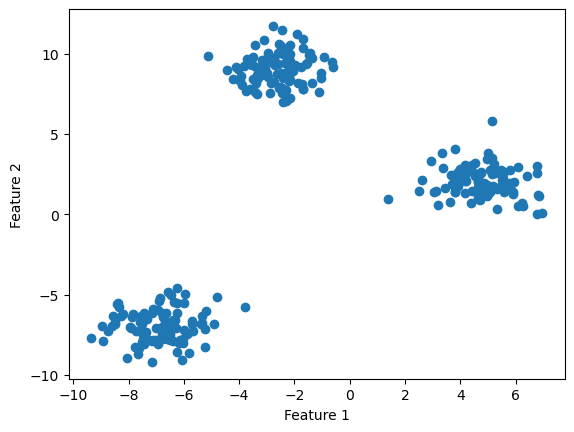

In [4]:
# Generate random data
X, y = make_blobs(n_samples=300, centers=3, random_state=42)
#### Display points
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### => KMeans object with three clusters 

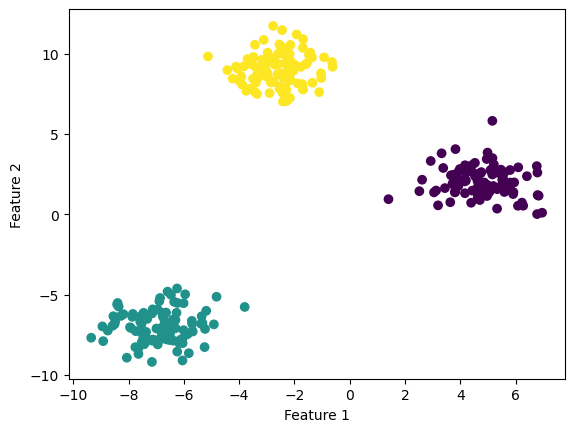

In [5]:
"""
N.B.
- 'n_init' must be explicited to suppress the warning super()._check_params_vs_input(X, default_n_init=10)
"""
try:
    kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42) 
    kmeans.fit(X)
    # Cluster labels assigned to each data point
    labels = kmeans.labels_
except AttributeError:
    pass

#### Display clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

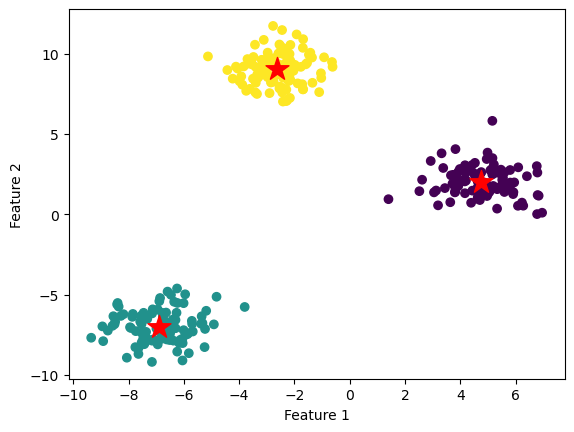

In [6]:
###### Visualize the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [7]:
""" Evaluate the clustering performance
N.B.1
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) 
and the mean nearest-cluster distance (b) for each sample.  
N.B.2
The Silhouette Coefficient for a sample is "(b - a) / max(a,b)".  
'b' is the distance between a sample and the nearest cluster that the sample is not a part of.
OK if number of labels is `2 <= n_labels <= n_samples - 1`.
"""
this_score = silhouette_score(X, labels)
print(f"The silhouette score is {this_score:.2f}")

The silhouette score is 0.85


<h2 style="color:#0AE42F  "> <u> Example 2 </u></h2>

In [8]:
df_countries = pd.read_csv("./data_to_use/countries_data.csv")
df_countries.tail()

,country,latitude,longitude,name
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia
244,ZW,-19.015438,29.154857,Zimbabwe


In [9]:
df_countries.isnull().sum()

country      1
latitude     1
longitude    1
name         0
dtype: int64

In [10]:
df_countries.dropna(inplace=True)

In [11]:
km = KMeans(n_clusters=7, n_init=10)
xfeatures = df_countries[['longitude','latitude']]

In [12]:
with suppress_warnings():
    clusters = km.fit_predict(xfeatures);

In [15]:
km.labels_

array([5, 0, 0, 2, 2, 5, 0, 2, 6, 6, 2, 1, 5, 3, 2, 0, 5, 2, 4, 5, 5, 5,
       0, 6, 5, 2, 4, 2, 2, 2, 4, 6, 6, 5, 2, 2, 4, 6, 6, 6, 5, 5, 1, 2,
       6, 4, 2, 2, 2, 5, 4, 0, 5, 5, 0, 5, 2, 2, 5, 2, 5, 0, 5, 0, 5, 0,
       5, 3, 2, 3, 5, 5, 6, 5, 2, 0, 2, 5, 5, 5, 5, 5, 5, 2, 6, 5, 2, 2,
       3, 5, 2, 0, 4, 6, 2, 5, 2, 5, 4, 5, 0, 5, 4, 4, 0, 0, 5, 5, 5, 2,
       0, 4, 6, 0, 4, 1, 6, 2, 4, 4, 0, 2, 0, 4, 0, 2, 5, 4, 5, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 3, 5, 5, 4, 4, 4, 3, 2, 5, 2, 5, 6, 4, 6, 2,
       4, 6, 3, 5, 3, 5, 2, 5, 5, 4, 3, 1, 3, 0, 2, 2, 1, 3, 4, 0, 5, 2,
       1, 2, 0, 5, 3, 2, 0, 6, 5, 5, 4, 6, 0, 3, 6, 0, 5, 4, 6, 5, 5, 5,
       5, 5, 5, 0, 2, 6, 2, 0, 6, 2, 5, 6, 5, 4, 0, 1, 3, 0, 5, 1, 0, 2,
       3, 4, 6, 0, 6, 2, 2, 0, 5, 2, 2, 2, 2, 4, 3, 1, 1, 5, 0, 6, 6, 6,
       6], dtype=int32)

In [14]:
clusters

array([5, 0, 0, 2, 2, 5, 0, 2, 6, 6, 2, 1, 5, 3, 2, 0, 5, 2, 4, 5, 5, 5,
       0, 6, 5, 2, 4, 2, 2, 2, 4, 6, 6, 5, 2, 2, 4, 6, 6, 6, 5, 5, 1, 2,
       6, 4, 2, 2, 2, 5, 4, 0, 5, 5, 0, 5, 2, 2, 5, 2, 5, 0, 5, 0, 5, 0,
       5, 3, 2, 3, 5, 5, 6, 5, 2, 0, 2, 5, 5, 5, 5, 5, 5, 2, 6, 5, 2, 2,
       3, 5, 2, 0, 4, 6, 2, 5, 2, 5, 4, 5, 0, 5, 4, 4, 0, 0, 5, 5, 5, 2,
       0, 4, 6, 0, 4, 1, 6, 2, 4, 4, 0, 2, 0, 4, 0, 2, 5, 4, 5, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 3, 5, 5, 4, 4, 4, 3, 2, 5, 2, 5, 6, 4, 6, 2,
       4, 6, 3, 5, 3, 5, 2, 5, 5, 4, 3, 1, 3, 0, 2, 2, 1, 3, 4, 0, 5, 2,
       1, 2, 0, 5, 3, 2, 0, 6, 5, 5, 4, 6, 0, 3, 6, 0, 5, 4, 6, 5, 5, 5,
       5, 5, 5, 0, 2, 6, 2, 0, 6, 2, 5, 6, 5, 4, 0, 1, 3, 0, 5, 1, 0, 2,
       3, 4, 6, 0, 6, 2, 2, 0, 5, 2, 2, 2, 2, 4, 3, 1, 1, 5, 0, 6, 6, 6,
       6], dtype=int32)

In [13]:
# Check if predicted clusters is the same as our labels
clusters is km.labels_

True

In [17]:
# Centroid/Center
km.cluster_centers_

array([[  47.22305212,   30.08667756],
       [-164.167216  ,  -15.7990057 ],
       [ -69.68218541,    8.58624816],
       [ 156.84523619,   -7.98094281],
       [ 103.45510325,   18.34838525],
       [   6.27951931,   39.29820125],
       [  29.90412153,  -16.55217197]])

In [18]:
# Add new column for cluster_continents
df_countries['cluster_continents'] = clusters
df_countries[:10]

,country,latitude,longitude,name,cluster_continents
0,AD,42.546245,1.601554,Andorra,5
1,AE,23.424076,53.847818,United Arab Emirates,0
2,AF,33.939110,67.709953,Afghanistan,0
3,AG,17.060816,-61.796428,Antigua and Barbuda,2
4,AI,18.220554,-63.068615,Anguilla,2
5,AL,41.153332,20.168331,Albania,5
6,AM,40.069099,45.038189,Armenia,0
7,AN,12.226079,-69.060087,Netherlands Antilles,2
8,AO,-11.202692,17.873887,Angola,6
9,AQ,-75.250973,-0.071389,Antarctica,6


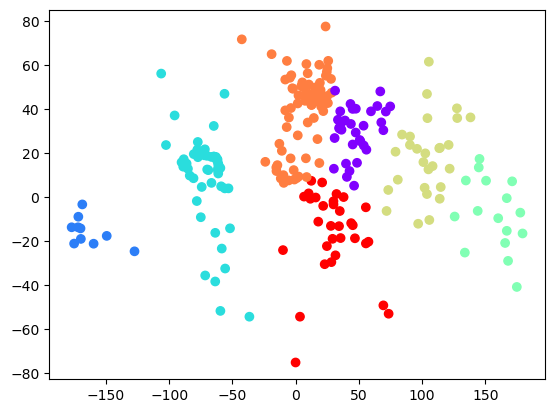

In [20]:
plt.scatter(df_countries['longitude'], df_countries['latitude'], c=df_countries['cluster_continents'],cmap='rainbow');

(-198.0, 198.00000000000006, -98.6822565, 92.3273865)

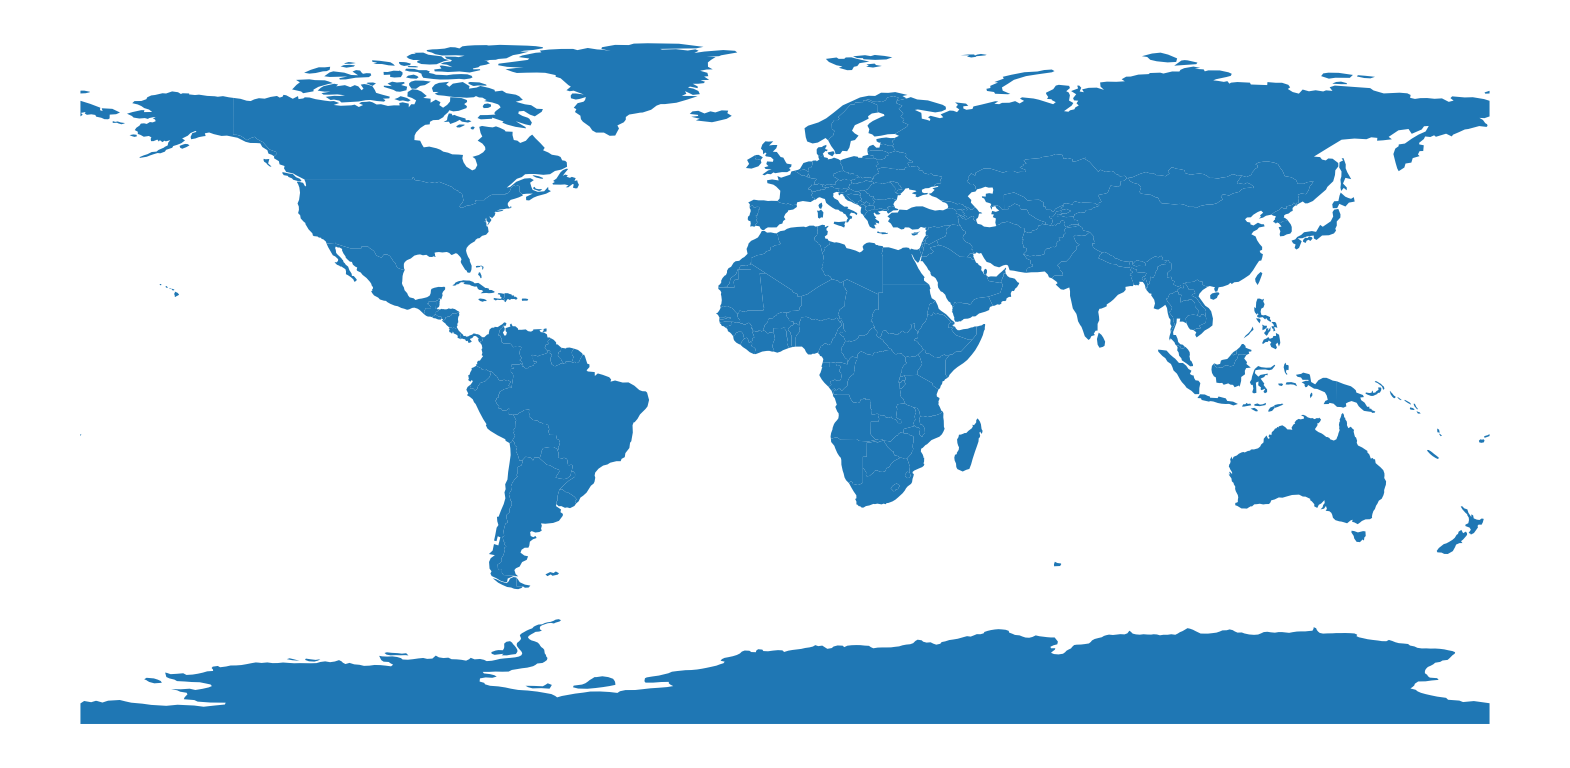

In [21]:
""" Map the plot over worldmap """
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('off')

In [22]:
# Overlap with current clusters
g01 = gpd.GeoDataFrame(df_countries,geometry = gpd.points_from_xy(df_countries['longitude'], df_countries['latitude']))

In [23]:
g01

,country,latitude,longitude,name,cluster_continents,geometry
0,AD,42.546245,1.601554,Andorra,5,POINT (1.60155 42.54624)
1,AE,23.424076,53.847818,United Arab Emirates,0,POINT (53.84782 23.42408)
2,AF,33.939110,67.709953,Afghanistan,0,POINT (67.70995 33.93911)
3,AG,17.060816,-61.796428,Antigua and Barbuda,2,POINT (-61.79643 17.06082)
4,AI,18.220554,-63.068615,Anguilla,2,POINT (-63.06862 18.22055)
...,...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,0,POINT (48.51639 15.55273)
241,YT,-12.827500,45.166244,Mayotte,6,POINT (45.16624 -12.82750)
242,ZA,-30.559482,22.937506,South Africa,6,POINT (22.93751 -30.55948)
243,ZM,-13.133897,27.849332,Zambia,6,POINT (27.84933 -13.13390)


<Axes: >

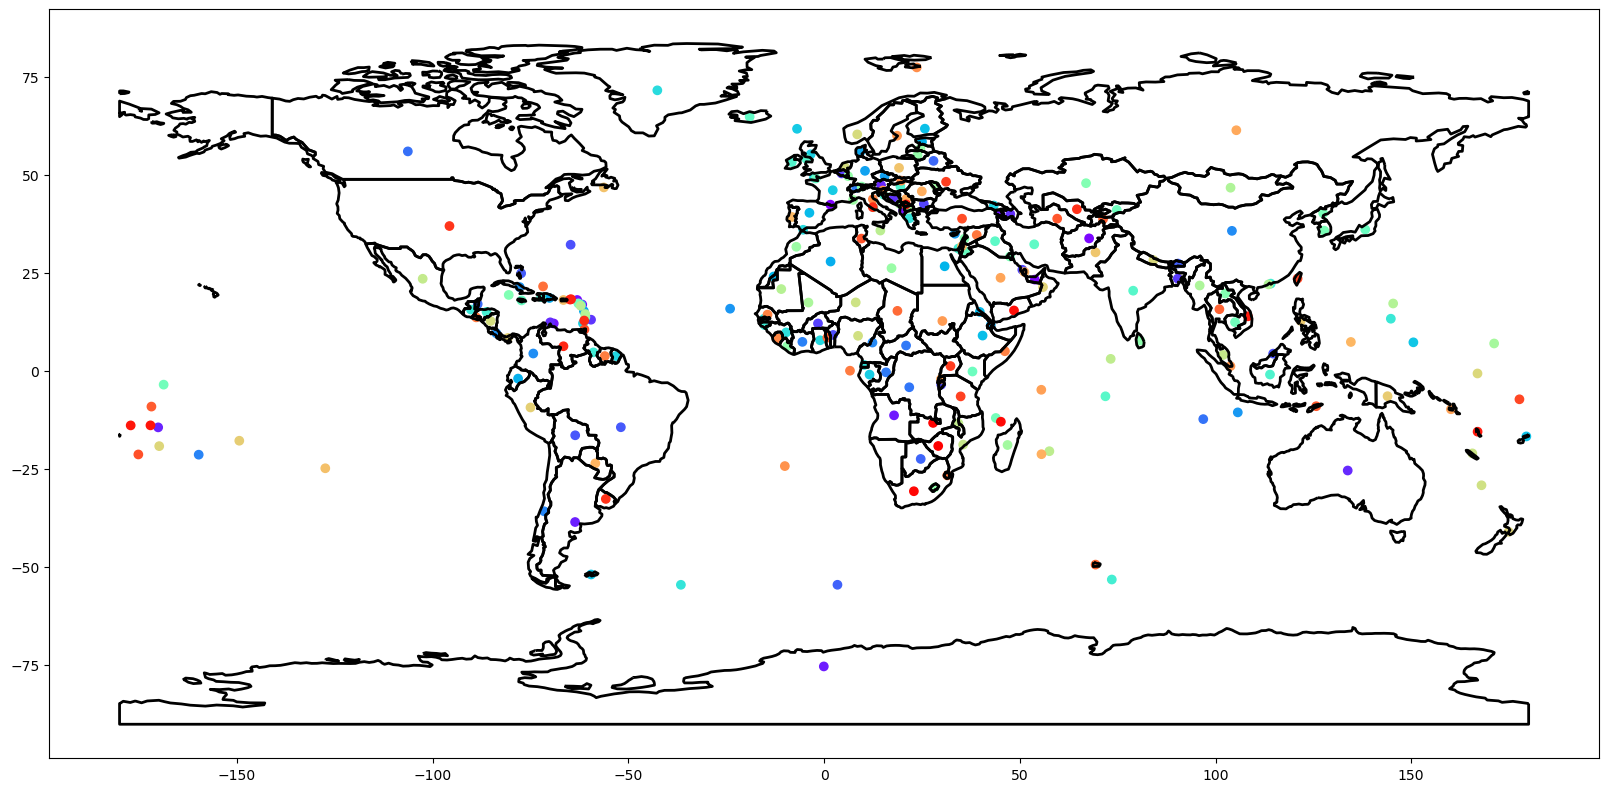

In [24]:
fig,ax = plt.subplots(figsize=(20,10))
g01.plot(cmap='rainbow',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

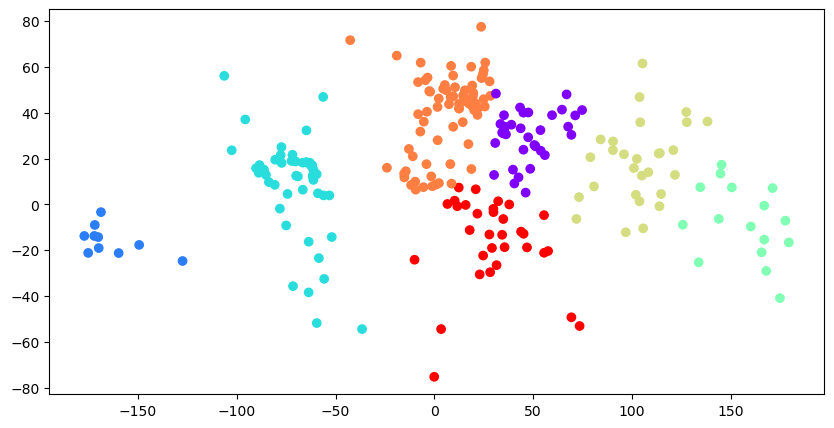

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(df_countries['longitude'], df_countries['latitude'], c=df_countries['cluster_continents'], cmap='rainbow');

In [26]:
continent_dict = {'South America':0,'North America':1,'Asia':2,'Africa':3,'Australasia':4,'Europe':5}

In [27]:
df_countries[df_countries['cluster_continents'] == 3]

,country,latitude,longitude,name,cluster_continents
13,AU,-25.274398,133.775136,Australia,3
67,FJ,-16.578193,179.414413,Fiji,3
69,FM,7.425554,150.550812,Micronesia,3
88,GU,13.444304,144.793731,Guam,3
139,MH,7.131474,171.184478,Marshall Islands,3
145,MP,17.330830,145.384690,Northern Mariana Islands,3
157,NC,-20.904305,165.618042,New Caledonia,3
159,NF,-29.040835,167.954712,Norfolk Island,3
165,NR,-0.522778,166.931503,Nauru,3
167,NZ,-40.900557,174.885971,New Zealand,3


In [28]:
x_scaled = StandardScaler().fit_transform(xfeatures)
x_scaled[0]

array([-0.15777985,  0.9709565 ])